In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# replacing male and female with 0 ,1

df["Gender"].replace(["Male","Female"],[0,1],inplace=True)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [4]:
X = df.iloc[:,1:4]
y = df['Purchased']

In [5]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
#Data Preprocessing: Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.ensemble import BaggingClassifier
# Modeling (Bagging Classifier)
bg = BaggingClassifier(n_estimators=100, random_state=42)
bg.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [8]:
# Prediction
y_pred = bg.predict(X_test)
print("Bagging classifier Predict: ",y_pred)

Bagging classifier Predict:  [1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 0 0 1 0 0]


In [9]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
# Mean Squared Error (MSE) - Not commonly used for classification, but can be calculated
mse = mean_squared_error(y_test, y_pred)
print("Bagging Classifier MSE:",mse)

Bagging Classifier MSE: 0.11666666666666667


In [10]:
from sklearn.metrics import  roc_auc_score, auc, roc_curve
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report Bagging:\n", class_report)

Classification Report Bagging:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91        73
           1       0.87      0.83      0.85        47

    accuracy                           0.88       120
   macro avg       0.88      0.87      0.88       120
weighted avg       0.88      0.88      0.88       120



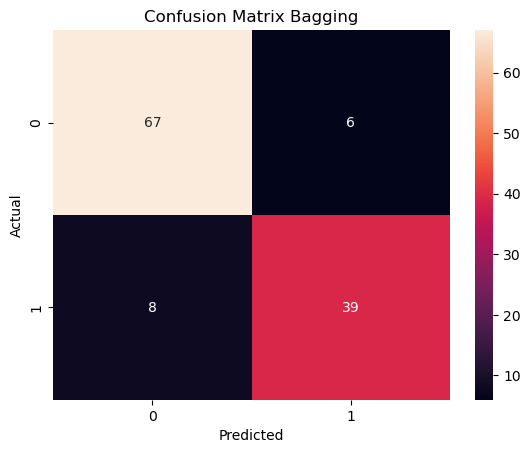

In [11]:
# Confusion Matrix
import seaborn as sns

cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Bagging')
plt.show()

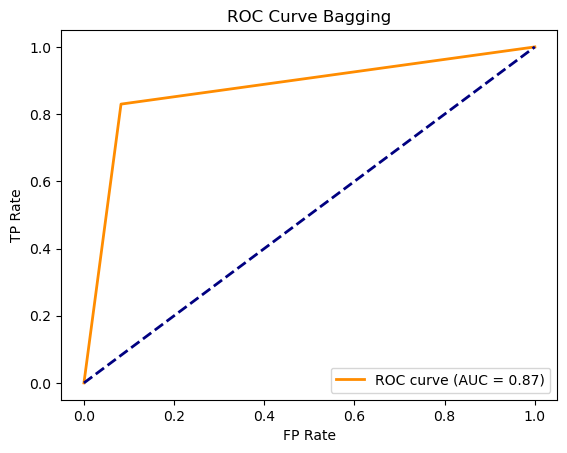

In [12]:
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the AUC (Area Under the Curve)
    auc = roc_auc_score(y_test, y_pred)
    # Create the ROC curve plot
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title(f'ROC Curve Bagging')
    plt.legend(loc='lower right')
    plt.show()